In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

from keras.layers import Input, Dense, Lambda, Layer, GaussianNoise, Conv1D, MaxPooling1D, UpSampling1D
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.utils import plot_model


建立CDAE autoencoder 模型

In [83]:
#CDAE AutoEncoder
x = Input(shape=(9000,1))
noise = GaussianNoise(stddev=0.01)(x)
conv1 = Conv1D(filters=32, kernel_size=2, strides=1 ,padding='same', activation='relu')(noise)
pool1 = MaxPooling1D(pool_size=2)(conv1)

conv2 = Conv1D(filters=16, kernel_size=2, strides=1,padding='same', activation='relu')(pool1)
pool2 = MaxPooling1D(pool_size=2)(conv2)

conv3 = Conv1D(filters=4, kernel_size=2, strides=1,padding='same', activation='relu')(pool2)
pool3 = MaxPooling1D(pool_size=2)(conv3)

upsamp4 = UpSampling1D(size=2)(pool3)
conv4 = Conv1D(filters=16, kernel_size=2, strides=1,padding='same', activation='relu')(upsamp4)

upsamp5 = UpSampling1D(size=2)(conv4)
conv5 = Conv1D(filters=32, kernel_size=2, strides=1,padding='same', activation='relu')(upsamp5)

upsamp6 = UpSampling1D(size=2)(conv5)
conv6 = Conv1D(filters=1, kernel_size=2, strides=1,padding='same', activation='relu')(upsamp6)
#output = Dense(400, activation='sigmoid')(pool3)
#model = Model(inputs=x,outputs=output)
model = Model(inputs=x,outputs=conv6)

In [84]:
model.summary()
model.compile(optimizer='adam', loss='mse')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 9000, 1)           0         
_________________________________________________________________
gaussian_noise_6 (GaussianNo (None, 9000, 1)           0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 9000, 32)          96        
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 4500, 32)          0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 4500, 16)          1040      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 2250, 16)          0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 2250, 4)           132       
__________

In [85]:
#plot_model(model, show_shapes=True, to_file='ECG_CDAE.png')

In [86]:
data = pd.read_csv('AliveCor_data/A00001.csv', header=None)

In [87]:
data.shape

(9000, 1)

In [88]:
df = data.values
df = df.reshape((1, 9000, 1))

In [93]:
data2 = pd.read_csv('AliveCor_data/A00022.csv', header=None)
df2 = data2.values
df2 = df2.reshape((1, 9000, 1))

In [90]:
# fit model
model.fit(df,df, epochs=20,batch_size=32)

Epoch 1/20
1/1 [==============================] - 42s 42s/step - loss: 0.0286
Epoch 2/20
1/1 [==============================] - 0s 100ms/step - loss: 0.0287
Epoch 3/20
1/1 [==============================] - 0s 100ms/step - loss: 0.0284
Epoch 4/20
1/1 [==============================] - 0s 116ms/step - loss: 0.0281
Epoch 5/20
1/1 [==============================] - 0s 118ms/step - loss: 0.0278
Epoch 6/20
1/1 [==============================] - 0s 113ms/step - loss: 0.0274
Epoch 7/20
1/1 [==============================] - 0s 128ms/step - loss: 0.0270
Epoch 8/20
1/1 [==============================] - 0s 109ms/step - loss: 0.0266
Epoch 9/20
1/1 [==============================] - 0s 106ms/step - loss: 0.0261
Epoch 10/20
1/1 [==============================] - 0s 99ms/step - loss: 0.0256
Epoch 11/20
1/1 [==============================] - 0s 98ms/step - loss: 0.0250
Epoch 12/20
1/1 [==============================] - 0s 99ms/step - loss: 0.0244
Epoch 13/20
1/1 [==============================] - 0s

預測重建後雜訊數值

In [96]:
yhat2 = model.predict(df2)
print(yhat2)

[[[0.39047435]
  [0.39344046]
  [0.3898847 ]
  ...
  [0.00256798]
  [0.00227573]
  [0.00139144]]]


In [99]:
pred = yhat2.reshape(9000,1)

繪製重建後訊號

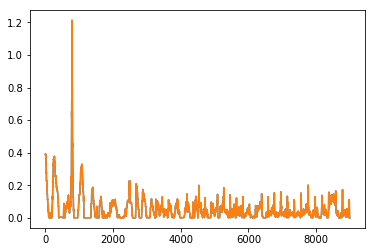

In [102]:
plt.plot(pred)
plt.show()